### Taylor Series

A **Taylor Series** is a representation of a function as an infinite sum of terms that are calculated from the values of the function's derivatives at a single point.

The Taylor series of a real or complex-valued function $f(x)$ that is infinitely differentiable at a real or complex number $a$ is the power series,

\begin{align} 
&f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots \\
&= \sum_{n=0}^{\infty}\frac{f^{n}(a)}{n!} (x-a)^n
\end{align}

When $a=0$, the series is also called a [Maclaurin series](http://mathworld.wolfram.com/MaclaurinSeries.html)

[YouTube Tutorial](https://www.youtube.com/watch?v=3d6DsjIBzJ4)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
plt.style.use('ggplot')

In [42]:
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n * factorial(n-1)

def Taylor(function, x0, n, x=sy.Symbol('x')):
    i = 0
    p = 0
    while i <= n:
        p += (function.diff(x, i).subs(x, x0)) / factorial(i) * (x - x0)**i
        i += 1
    return p

In [43]:
def plot(ax, f, x0=0,n0=1, n=5, by=2, x_lims = [-10, 10], y_lims = [-10, 10], 
         npoints=800, x=sy.Symbol('x'), func_name=None):
    x1 = np.linspace(x_lims[0], x_lims[1], npoints)
    for j in range(n0, n+1, by):
        func = Taylor(f, x0, j)
        taylor_lambda = sy.lambdify(x, func, 'numpy')
        ax.plot(x1, taylor_lambda(x1), label = 'Order '+str(j))
    func_lambda = sy.lambdify(x, f, 'numpy')
    ax.plot(x1, func_lambda(x1), label=func_name)
    #
    ax.set_xlim(x_lims)
    ax.set_ylim(y_lims)
    ax.legend()
    plt.grid(True)
    plt.show()

### Example 01: Exponential Function
Maclaurin series,

$$
e^x = \sum_{n!}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$

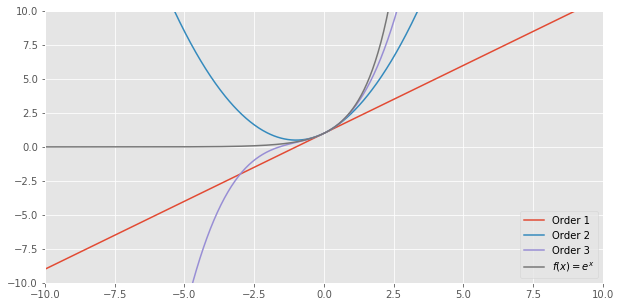

In [44]:
from sympy.functions import exp
x = sy.Symbol('x')
f = exp(x)
fig, ax = plt.subplots(figsize=(10,5))
plot(ax=ax, f=f, n=3, by=1, func_name = r'$f(x)=e^x$')

### Example 02: Natural Logarithm
The natural logarithm (with base e) has Maclaurin serise

$$
\log(1+x) = \sum_{n=1}^{\infty} (-1)^{n+1} \frac{x^N}{n} = x - \frac{x^2}{2} + \frac{x^3}{3} - \cdots
$$

/Users/yunlong/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in log
  """


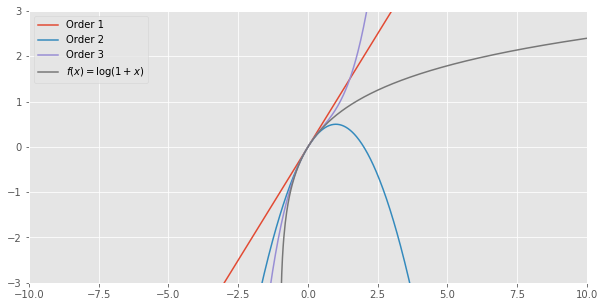

In [45]:
from sympy.functions import ln
x = sy.Symbol('x')
f = ln(1+x)
fig, ax = plt.subplots(figsize=(10, 5))
plot(ax=ax, f=f, n=3, by=1, y_lims=[-3,3],func_name = r'$f(x)=\log(1+x)$')

### Example 03: Trigonometric functions

Sine function:

$$
\sin x = \sum_{n=0}^{\infty}\frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{6}+\frac{x^5}{120} - \cdots
$$

Cosine function:

$$
\cos x = \sum_{n=0}^{\infty}\frac{(-1)^n}{(2n)!} x^{2n} = 1 - \frac{x^2}{2}+\frac{x^4}{24} - \cdots
$$


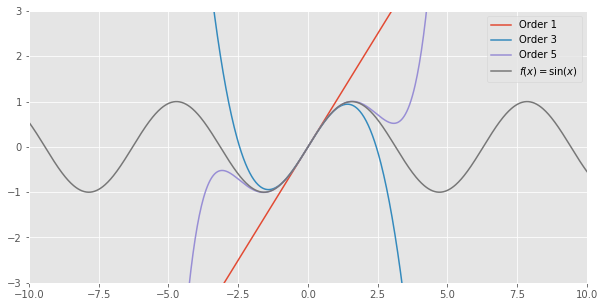

In [46]:
from sympy.functions import sin, cos
x = sy.Symbol('x')
f = sin(x)
fig, ax = plt.subplots(figsize=(10, 5))
plot(ax=ax, f=f, n=5, by=2, y_lims=[-3,3],func_name = r'$f(x)=\sin(x)$')

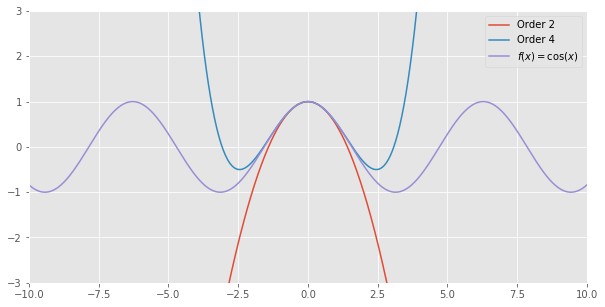

In [47]:
x = sy.Symbol('x')
f = cos(x)
fig, ax = plt.subplots(figsize=(10, 5))
plot(ax=ax, f=f, n0=2, n=5, by=2, y_lims=[-3,3],func_name = r'$f(x)=\cos(x)$')